# Project CCHAIN data pre-processing

## import relevant packages

In [1]:
import pandas as pd
import os
import time

from IPython.display import clear_output
start = time.time()

## check for dataset

In [2]:
data_folder = "CCHAIN_database"
local_directory = os.getcwd()

if data_folder not in os.listdir(local_directory):
    print(data_folder, os.listdir(local_directory))
    raise Exception("CCHAIN_database folder not found, please create it first.")
    
filename_list = os.listdir(local_directory+"\\"+data_folder)
if 'brgy_geography.csv' not in filename_list:
    raise Exception("Project CCHAIN files not found, please download and unpack the dataset into the /CCHAIN_database folder first")
    
if 'prepared_data' in os.listdir(local_directory):
    confirm = input("prepared_data folder already exists, are you sure you want to rerun the data preparation?\nif you continue, this will take ~20 minutes \nY/N:")
    if confirm != 'Y':
        raise SystemExit("Cancelling runtime!")

prepared_data folder already exists, are you sure you want to rerun the data preparation?
if you continue, this will take ~20 minutes 
Y/N:Y


## load all the tables

In [3]:
df_name_list = []

for i, filename in enumerate(filename_list):
    clear_output(wait=True)
    
    print(f"Files read/Total files: {i}/{len(filename_list)}")
    df_name = filename.split('.')[0].lower()
    df_name_list += df_name
    print(f"Reading: {filename}")
    df = pd.read_csv(local_directory+"\\"+data_folder+"\\"+filename)
    globals()[df_name] = df

Files read/Total files: 29/30
Reading: worldpop_population.csv


## create the base barangay dataframe

In [4]:
picked_cities = ['City of Mandaluyong','City of Navotas','City of Muntinlupa']

brgy = location[['adm3_en','adm3_pcode','adm4_en','adm4_pcode']]
base_barangay_df = pd.merge(brgy.assign(key=1), calendar.assign(key=1), on='key').drop('key', axis=1)
base_barangay_df = base_barangay_df.drop(base_barangay_df[~base_barangay_df.adm3_en.isin(picked_cities)].index)
base_barangay_df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date
927735,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01
927736,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02
927737,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03
927738,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04
927739,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05
...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30


## append climate data to barangay dataframe

In [5]:
df_with_climate_data = pd.merge(base_barangay_df, climate_atmosphere, on=['adm4_pcode','date'])
df_with_climate_data = df_with_climate_data.drop(['freq', 'uuid'], axis = 1)
df_with_climate_data

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,wind_speed,rh,solar_rad,uv_rad
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,5.03,71.26,199.32,23.89
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,6.13,70.34,214.67,24.67
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,3.70,66.81,221.31,24.98
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,5.93,69.28,205.95,24.69
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,6.20,74.02,197.95,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,2.81,70.32,120.84,14.76
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,2.55,70.91,134.82,16.43
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,1.80,74.08,59.58,7.38
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,0.78,72.41,139.43,17.06


## append osm_poi_health data to barangay dataframe

In [6]:
df_with_climate_data['date'] = pd.to_datetime(df_with_climate_data['date'])
df_with_climate_data['year'] = df_with_climate_data['date'].dt.year
df_barangay_health_poi = osm_poi_health
df_barangay_health_poi['date'] = pd.to_datetime(df_barangay_health_poi['date'])
df_barangay_health_poi['year'] = df_barangay_health_poi['date'].dt.year
df_barangay_health_poi = df_barangay_health_poi.drop(['date'],axis=1)

df = pd.merge(df_with_climate_data, right=df_barangay_health_poi, on=["year","adm4_pcode"], how="left").drop(['freq','uuid','year'],axis=1)
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336


## append population data to barangay dataframe

In [7]:
df_barangay_population = worldpop_population
df_barangay_population['date'] = pd.to_datetime(df_barangay_population['date'])
df_barangay_population['year'] = df_barangay_population['date'].dt.year

df['year'] = df['date'].dt.year

df = pd.merge(df, right=df_barangay_population[['year','adm4_pcode','pop_count_total','pop_density_mean']], on=['adm4_pcode','year'], how='left')
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN


## append barangay geographical data to barangay dataframe

In [8]:
df = pd.merge(df, right=brgy_geography[['brgy_total_area', 'adm4_pcode']], on=["adm4_pcode"], how='left')
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean,brgy_total_area
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661


## convert barangay dataframe from 'daily' to 'monthly'

In [9]:
import datetime

df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

In [10]:
df.tail(5)

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean,brgy_total_area,month
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12
365249,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-31,26.47,25.06,28.53,28.24,0.0,...,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12


In [11]:
import numpy as np
import time

static_columns = [
    'adm3_en',
    'adm3_pcode',
    'adm4_en',
    'adm4_pcode',
]
min_columns = [
    'date'
]
standard_average_columns = [
    'clinic_count',
    'dentist_count',
    'doctors_count',
    'hospital_count',
    'optician_count',
    'pharmacy_count',
    'clinic_nearest',
    'dentist_nearest',
    'doctors_nearest',
    'hospital_nearest',
    'optician_nearest',
    'pharmacy_nearest',
    'pop_count_total',
    'pop_density_mean',
]
weighted_average_columns = [
    'tave',
    'tmin',
    'tmax', 
    'heat_index',
    'pr',
    'wind_speed',
    'rh',
    'solar_rad',
    'uv_rad',
]

dfs_to_merge = []
by = ['year','month','adm3_pcode']
df.fillna(0)

def group_weighted_averages(df, weights, values, by):
    return df.groupby(by, dropna=False).apply(lambda x: np.average(x[values],weights=x[weights]))

def group_standard_averages(df, values, by):
    return df.groupby(by, dropna=False)[values].mean()

for i, column in enumerate(weighted_average_columns):
    print(f"grouping {column} from df")
    dfs_to_merge.append(group_weighted_averages(df, weights='brgy_total_area', values=column, by=by))
    clear_output(wait=True)
    
for i, column in enumerate(standard_average_columns):
    print(f"grouping {column} from df")
    dfs_to_merge.append(group_standard_averages(df, values=column, by=by))
    clear_output(wait=True)
    
clear_output(wait=True)
print("done!")
merged_df = pd.concat(dfs_to_merge, axis = 1, keys = weighted_average_columns+standard_average_columns).reset_index()

done!


In [12]:
merged_df.tail(10)

,year,month,adm3_pcode,tave,tmin,tmax,heat_index,pr,wind_speed,rh,...,optician_count,pharmacy_count,clinic_nearest,dentist_nearest,doctors_nearest,hospital_nearest,optician_nearest,pharmacy_nearest,pop_count_total,pop_density_mean
710,2022,9,PH137603000,27.540908,25.738102,30.064491,31.239345,14.555647,2.593243,82.858124,...,0.777778,4.555556,10000.0,811.060068,784.743707,847.888714,901.375503,205.423565,NaN,NaN
711,2022,10,PH137401000,28.400000,26.402581,30.901290,32.587419,10.558468,2.166129,78.191290,...,0.037037,1.518519,10000.0,140.463032,372.299740,799.776049,1327.641416,63.043836,NaN,NaN
712,2022,10,PH137503000,28.231290,25.980645,30.784839,32.220645,10.523378,1.863226,78.751935,...,0.000000,0.357143,10000.0,9770.122342,9876.618034,1027.185296,9998.301374,422.488715,NaN,NaN
713,2022,10,PH137603000,28.137468,26.111071,30.730273,32.022728,11.630438,2.164891,78.742979,...,0.777778,4.555556,10000.0,811.060068,784.743707,847.888714,901.375503,205.423565,NaN,NaN
714,2022,11,PH137401000,28.292000,26.239000,30.962667,32.337333,2.527374,2.298667,78.390333,...,0.037037,1.518519,10000.0,140.463032,372.299740,799.776049,1327.641416,63.043836,NaN,NaN
715,2022,11,PH137503000,28.439667,26.182667,31.148333,32.513667,4.100022,1.723333,77.695667,...,0.000000,0.357143,10000.0,9770.122342,9876.618034,1027.185296,9998.301374,422.488715,NaN,NaN
716,2022,11,PH137603000,28.015087,25.940205,30.750375,31.753563,6.320555,2.359961,78.969753,...,0.777778,4.555556,10000.0,811.060068,784.743707,847.888714,901.375503,205.423565,NaN,NaN
717,2022,12,PH137401000,27.092903,25.429677,29.447097,29.647742,2.187099,2.363226,76.140323,...,0.037037,1.518519,10000.0,140.463032,372.299740,799.776049,1327.641416,63.043836,NaN,NaN
718,2022,12,PH137503000,27.024194,25.287742,29.404839,29.440968,1.897811,2.032903,75.235484,...,0.000000,0.357143,10000.0,9770.122342,9876.618034,1027.185296,9998.301374,422.488715,NaN,NaN
719,2022,12,PH137603000,26.814025,25.142131,29.195462,29.160943,6.561790,2.391956,76.837518,...,0.777778,4.555556,10000.0,811.060068,784.743707,847.888714,901.375503,205.423565,NaN,NaN


## append disease_lgu_disaggregated_totals to df 

In [13]:
df = merged_df

df_disease = disease_fhsis_totals
df_disease['date'] = pd.to_datetime(df_disease['date'])
df_disease['month'] = df_disease['date'].apply(lambda x: x.month)
df_disease['year'] = df_disease['date'].apply(lambda x: x.year)
df_disease = df_disease.drop(df_disease[df_disease.freq != 'M'].index)
df_disease = df_disease.drop(['uuid','freq','source_filename','source_name','disease_icd10_code','date'], axis=1)
df_disease = df_disease.groupby(by=['adm3_pcode','disease_common_name','month','year']).sum().reset_index()
df = df.drop(df[df['year'] < 2010].index)

df_dict = {}
for disease in df_disease['disease_common_name'].unique():
    df_dict[disease] = pd.merge(df, 
                                right=df_disease[df_disease['disease_common_name']==disease], 
                                on=['year','month','adm3_pcode'], 
                                how='left')
    df_dict[disease] = df_dict[disease].drop('disease_common_name', axis=1)
df_dict.keys()

dict_keys(['DENGUE FEVER', 'DIABETES', 'HYPERTENSIVE HEART DISEASE', 'ISCHEMIC HEART DISEASE', 'ISCHEMIC STROKE', 'ASTHMA', 'LEPTOSPIROSIS', 'ACUTE BLOODY DIARRHEA', 'CHOLERA', 'RABIES', 'TYPHOID FEVER', 'ANGINA'])

## convert categorical to numerical values

In [14]:
'''df = pd.merge(df, right=df_disease, on=['year','month','adm3_pcode'], how='left')
df['sex'] = df['sex'].astype('category')
df['age_group'] = df['age_group'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
cat_mappings = {}

for column in cat_columns:
    cat_mappings[column] = dict((original_cat, new_cat) for new_cat, original_cat in enumerate(df[column].cat.categories))
    print(f"{column} categorical mapping:")
    for i, category in enumerate(cat_mappings[column]):
        print(f"{i}:\t{category}")

for disease in df_dict.keys():
    disease_df = df_dict[disease]
    for column in cat_mappings.keys():
        disease_df[column] = disease_df[column].astype('category')
        disease_df[column] = disease_df[column].cat.rename_categories(cat_mappings[column])
    df_dict[disease] = disease_df
    
df_dict['TYPHOID FEVER'].sort_values('case_total')'''

'df = pd.merge(df, right=df_disease, on=[\'year\',\'month\',\'adm3_pcode\'], how=\'left\')\ndf[\'sex\'] = df[\'sex\'].astype(\'category\')\ndf[\'age_group\'] = df[\'age_group\'].astype(\'category\')\n\ncat_columns = df.select_dtypes([\'category\']).columns\ncat_mappings = {}\n\nfor column in cat_columns:\n    cat_mappings[column] = dict((original_cat, new_cat) for new_cat, original_cat in enumerate(df[column].cat.categories))\n    print(f"{column} categorical mapping:")\n    for i, category in enumerate(cat_mappings[column]):\n        print(f"{i}:\t{category}")\n\nfor disease in df_dict.keys():\n    disease_df = df_dict[disease]\n    for column in cat_mappings.keys():\n        disease_df[column] = disease_df[column].astype(\'category\')\n        disease_df[column] = disease_df[column].cat.rename_categories(cat_mappings[column])\n    df_dict[disease] = disease_df\n    \ndf_dict[\'TYPHOID FEVER\'].sort_values(\'case_total\')'

In [15]:
df_dict.keys()

dict_keys(['DENGUE FEVER', 'DIABETES', 'HYPERTENSIVE HEART DISEASE', 'ISCHEMIC HEART DISEASE', 'ISCHEMIC STROKE', 'ASTHMA', 'LEPTOSPIROSIS', 'ACUTE BLOODY DIARRHEA', 'CHOLERA', 'RABIES', 'TYPHOID FEVER', 'ANGINA'])

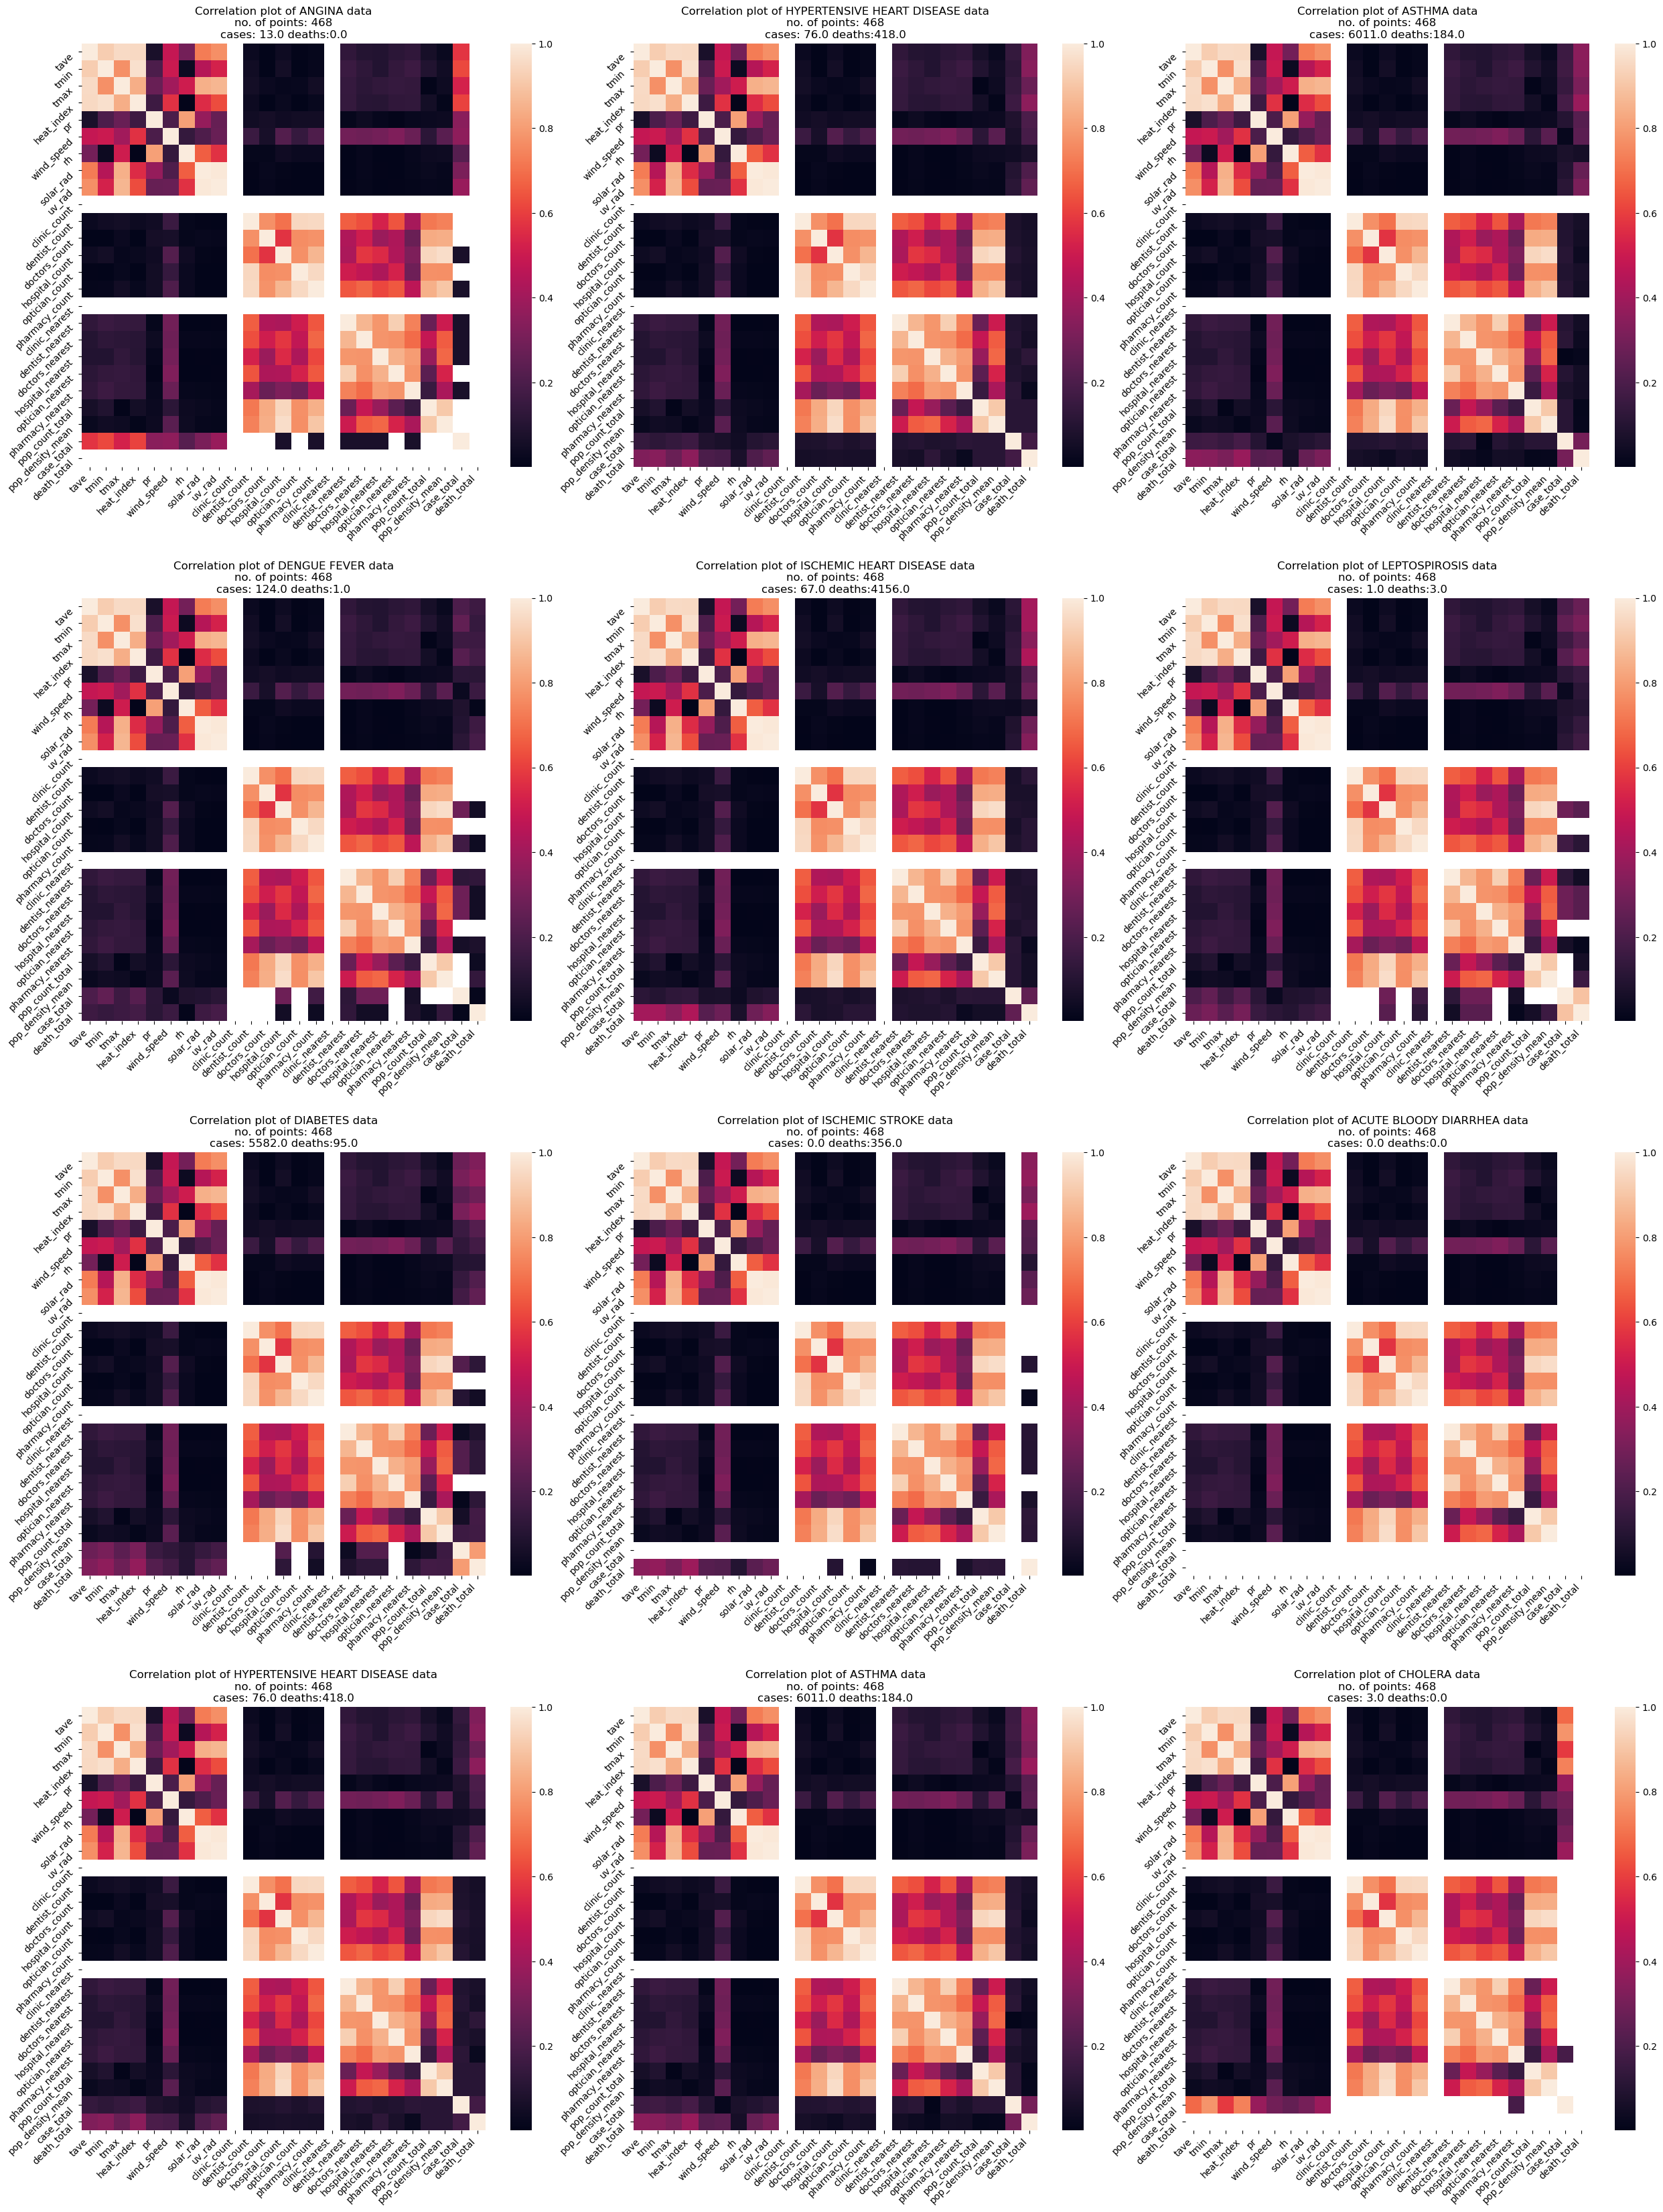

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

r = math.ceil(len(df_dict.keys())/3)
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    for y in range(c):
        index = (x+y*3)-1
        if index > len(disease_keys):
            continue;
        disease = disease_keys[index]
        heatmap_data = df_dict[disease].drop(['year','month','adm3_pcode'],axis=1).corr()
        heatmap_data = heatmap_data.apply(lambda i: abs(i))
        sns.heatmap(heatmap_data, vmax=1, ax=ax[x, y])
        ax[x, y].set_xticks(ax[x, y].get_xticks(),rotation=45,labels=ax[x, y].get_xticklabels(),ha='right',va='top')
        ax[x, y].set_yticks(ax[x, y].get_yticks(),rotation=45,labels=ax[x, y].get_yticklabels(),ha='right',va='top')
        ax[x, y].set_title(f"Correlation plot of {disease} data\nno. of points: {len(df_dict[disease])}\ncases: {df_dict[disease]['case_total'].sum()} deaths:{df_dict[disease]['death_total'].sum()}")
        ax[x, y].plot()

# save data into /prepared_data folder for use.

In [17]:
if 'prepared_data' not in os.listdir():
    os.mkdir('prepared_data')

for disease in df_dict.keys():
    df_dict[disease].to_csv(f'{local_directory}/prepared_data/{disease}.csv')

In [18]:
stop = time.time()
print(f"Total execution time: {time.strftime('%H:%M:%S', time.gmtime(stop-start))}")

Total execution time: 00:02:14
